# یک سیستم ساده

اگر از درس شیمی به خاطر داشته باشید، با استفاده از ساختار لوویس می‌توانستیم الکترون‌ها و پیوندهای مولکول‌ها را نشان دهیم. اما بعضی مولکول‌ها بودند که چند ساختار لوویس داشتند که به اصطلاح به آن‌ها رزونانس می‌گفتیم. برای مثال بنزن یا آمونیاک که هر دو ساختارهای دو حالته داشتند. در شکل زیر ساختارهای ممکن بنزن را می‌بینیم.

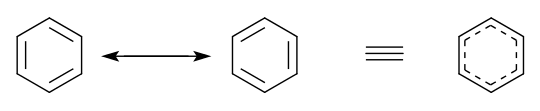

پس برای توصیف مولکول بنزن، باید از یک سیستم دو حالته استفاده کنیم. پس دوبردار پایه این فضا را تعریف می‌کنیم: به ساختار لوویس اول بردار
$\vert 0 \rangle = \begin{pmatrix}
1\\0
\end{pmatrix}$
و به ساختار دوم بردار
$\vert 1 \rangle = \begin{pmatrix}
0\\1
\end{pmatrix}$
را نسبت می‌دهیم. سیستم را می‌توانیم با هامیلتونی زیر که یک ماتریس هرمیتی است توصیف کنیم.
$$\hat{H} = \begin{pmatrix}
E_0 & -\Delta \\-\Delta & E_0
\end{pmatrix}$$

درایه‌های قطری به این معنی هستند که اگر هر یک از ساختارها را به تنهایی داشتیم هر کدام انرژی
$E_0$ 
داشتند. و درایه‌های غیر قطری $-\Delta$ برای این هستند که این دو ساختار بتوانند با احتمالی غیر صفر به یکدیگر تبدیل شوند. 
1. ماتریس هامیلتونی بالا را قطری کنید و ویژه‌بردارها و ویژه‌مقدارهای آن را به دست آورید.

حالا می‌خواهیم تحول این سیستم را بررسی کنیم. بنابراین از معادله شرودینگر استفاده می‌کنیم.
$$i \hbar \frac{d}{dt} \vert \psi(t) \rangle = \hat{H} \vert \psi(t) \rangle$$
تابع موج در زمان‌های مختلف را می‌توانیم برحسب بردارهای پایه فضا بسط دهیم.
$$\vert \psi(t) \rangle = c_0(t) \vert 0 \rangle + c_1(t) \vert 1 \rangle = \begin{pmatrix} c_0(t) \\ c_1(t) \end{pmatrix}$$
بنابراین مسئله تبدیل می‌شود به پیدا کردن تحولات ضرایب $c_0 (t)$ و $c_1 (t)$. با قرار دادن تابع موج برحسب این ضرایب در معادله شرودینگر دو معادله دیفرانسیل خطی خواهیم داشت.

2. این دو معادله دیفرانسیل را به دست آورید و با تغییر متغییر آنها را به صورت زیر بازنویسی کنید.
$$i \hbar \frac{d(c_0 + c_1)}{dt} = (E_0 - \Delta) (c_0 + c_1)$$
$$i \hbar \frac{d(c_0 - c_1)}{dt} = (E_0 + \Delta) (c_0 - c_1)$$
3. 	معادلات بالا را حل کنید و ضرایب $c_0 (t)$ و $c_1 (t)$ را به دست آورید. می‌توانید این معادلات را به صورت عددی حل کنید. 

4. نشان دهید که در زمان‌های مختلف، احتمال اینکه بنزن در ساختار اول و دوم باشد برابر است با $\vert c_0(t) \vert^2$ و $\vert c_1(t) \vert^2$. از روی جواب قسمت قبل نمودار این احتمالات برحسب زمان را رسم کنید. 
5. با استفاده از جواب بخش قبل ساختار رزونانسی بنزن را توصیف کنید.

حالا می‌خواهیم این جواب‌ها را از روش دیگری به دست آوریم.

6. از جواب های بخش اول استفاده کنید و معادله شرودینگر را در پایه ویژه‌بردارهای ماتریس هامیلتونی بنویسید. یعنی بجای اینکه $\vert \psi(t) \rangle$ را در پایه $\vert 0 \rangle$ و $\vert 1 \rangle$ بنویسم، در پایه‌ای که در بخش یک بدست آوردیم بنویسیم.
7. تحولات ویژه‌بردارهای هامیلتونی را با استفاده از معادله بخش قبل به دست آورید. مشاهده کنید که مشابه جواب‌های بخش ۳ می‌شود.

## آماده‌سازی‌ها

In [63]:
import numpy as np
import matplotlib.pylab as plt

In [64]:
# use for finding eigenvalue and eigenvectors
from numpy import linalg as LA

In [65]:
def dagger(x : str):
    return np.mat(x).conj().T
# e.g. dagger(np.mat([1 + 1j,0,0]))

In [ ]:
# calculate e^matrix
from scipy.linalg import expm

In [66]:
#part 3
def evolution(H,initial,T):
    N = 1000
    delta_t = T / N
    hbar = 1
    psi = initial
    psi_t = psi
    c_0 = complex_rand(N)
    c_1 = complex_rand(N)
    for i in range(N):
        psi_t = np.matmul(expm(-1j * delta_t * H ) , psi) # psi(t) = e^{-itH} psi_0
        psi = psi_t
        c_0[i] = psi_t[0]
        c_1[i] = psi_t[1]
    return psi_t,c_0,c_1

## جوابِ سؤال به شکلِ کد

In [67]:
# you can create a random matrix/vector using this function
def complex_rand(*args):
    return np.random.rand(*args) * np.exp(1j * 2 * np.pi * np.random.rand(*args))

In [68]:
# part 1
e = 10
delta = 1
H = np.array([[e,-delta],[-delta,e]])
energies, U = LA.eig(H)
print('energies:' ,energies)
print('eigenvectors: U = ' ,U)

energies: [11.  9.]
eigenvectors: U =  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [69]:
# part 2 and 3
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

psi_0 = ket0
def evolution(H,initial,T):
    N = 1000
    delta_t = T / N
    hbar = 1
    psi = initial
    psi_t = psi
    c_0 = complex_rand(N)
    c_1 = complex_rand(N)
    for i in range(N):
        psi_t = np.matmul(expm(-1j * delta_t * H ) , psi)
        psi = psi_t
        c_0[i] = psi_t[0]
        c_1[i] = psi_t[1]
    return psi_t,c_0,c_1

psi_final,c_0,c_1 = evolution(H,psi_0,10)
print('psi(T) = ',psi_final)

psi(T) =  [[-0.72354721-0.42487699j]
 [ 0.2754736 -0.46911967j]]


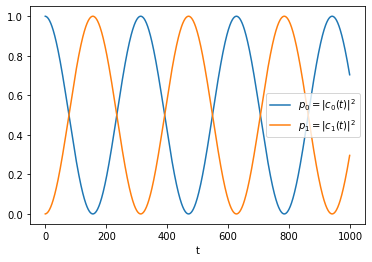

In [70]:
# part 4
p_0 = np.real(np.conjugate(c_0)*c_0)
p_1 = np.real(np.conjugate(c_1)*c_1)
plt.plot(p_0,label='$p_0 = |c_0(t)|^2$')
plt.plot(p_1,label='$p_1 = |c_1(t)|^2$')
plt.legend()
plt.xlabel('t')
plt.show()

In [76]:
# part 6

# change the basis
H_d = np.matmul(np.matmul(dagger(U),H),U)
psi_0_tilde = np.matmul(dagger(U),psi_0)

print('H diagonal = ',H_d)
print('psi_tilde = ',psi_0_tilde)

H diagonal =  [[11.  0.]
 [ 0.  9.]]
psi_tilde =  [[0.70710678]
 [0.70710678]]


In [77]:
psi_final_tilde,c_0_tilde,c_1_tilde = evolution(H_d,psi_0_tilde,10)
print('psi_tilde(T) = ',psi_final_tilde)

psi_tilde(T) =  [[-0.70641439+0.0312843j]
 [-0.31683589-0.6321511j]]


In [79]:
# part 7
# return to 0 , 1 basis
psi_final_prime = np.matmul(U,psi_final_tilde)
print('psi_prime(T) = ',psi_final_prime) # part 6
print('psi(T) = ',psi_final) # part 3

psi_prime(T) =  [[-0.72354721-0.42487699j]
 [ 0.2754736 -0.46911967j]]
psi(T) =  [[-0.72354721-0.42487699j]
 [ 0.2754736 -0.46911967j]]


## جوابِ سؤال به شکلِ ریاضی
### جواب بخش 1
برای اینکه ویژه‌مقادیر و ویژه‌بردارهای هامیلتونی را پیدا کنیم باید معادله ویژه‌مقداری آن را حل کنیم.
$$\hat{H} \vert \psi \rangle = E \vert \psi \rangle$$
که در رابطه بالا $\vert E \rangle$ ویژه‌بردار هامیلتونی است که انرژی‌اش برابر است با $E$. به جای حل معادله 
$(\hat{H} - E \hat{\mathbb{1}} ) \vert E \rangle = 0$
اگر هامیلتونی را به صورت زیر بازنویسی کنیم
$$\hat{H} = E_0 \hat{\mathbb{1}} - \Delta \sigma_x$$
و از این استفاده کنیم که برای ماتریس پائولی $\sigma_x$ می‌دانیم که
$$\sigma_x \vert + \rangle = \vert + \rangle$$
$$\sigma_x \vert - \rangle = - \vert - \rangle$$
حالا می‌توانیم حدس بزنیم که ویژه‌بردارهای ماتریس هامیلتونی همین بردارهای $\vert + \rangle$ و $\vert - \rangle$ هستند. و با محاسبه تثر هامیلتونی روی آنها می‌توانیم انرژی‌ها را نیز به دست آوریم.
$$\hat{H} \vert + \rangle = (E_0 \hat{\mathbb{1}} - \Delta \sigma_x) \vert + \rangle = (E_0 - \Delta) \vert + \rangle $$
$$\hat{H} \vert - \rangle = (E_0 \hat{\mathbb{1}} - \Delta \sigma_x) \vert - \rangle = (E_0 + \Delta) \vert - \rangle $$
### جواب بخش 2 
برای اینکه معادلات دیفرانسیل حاکم بر ضرایب $c_0 (t)$ و $c_1 (t)$ را به دست آوریم تابع موج را به شکل داده شده می‌نویسیم و آن را داخل معادله شرودینگر قرار می‌دهیم. دقت کنیم که فعلا با جواب بخش اول که در آن هامیلتونی را قطری کرده بودیم کاری نداریم و از آن روش در بخش‌های بعدی استفاده خواهیم کرد.
$$ i \hbar \frac{d}{dt} \begin{pmatrix} c_0(t) \\ c_1(t) \end{pmatrix} = \begin{pmatrix} E_0 & -\Delta \\ -\Delta & E_0 \end{pmatrix}\begin{pmatrix} c_0(t) \\ c_1(t) \end{pmatrix} $$
که معادله ماتریسی بالا معادل است با یک دستگاه معادله دیفرانسیل خطی به شکل زیر:
$$i \hbar \frac{d c_0(t)}{dt} = E_0 c_0(t) - \Delta c_1(t)$$
$$i \hbar \frac{d c_1(t)}{dt} = - \Delta c_0(t) + E_0 c_1(t)$$
اگر دو معادله بالا را یک‌بار با هم جمع و یک‌بار از هم کم کنیم به دو معادله گفته شده در صورت سوال می‌رسیم.
$$i \hbar \frac{d(c_0 + c_1)}{dt} = (E_0 - \Delta) (c_0 + c_1)$$
$$i \hbar \frac{d(c_0 - c_1)}{dt} = (E_0 + \Delta) (c_0 - c_1)$$

### جواب بخش 3
حالا از دو معادله دیفرانسیل خطی بالا که با آن روش تغییر متغییری که دادیم دیگر جفت‌شده نیستند می‌توانیم دو عبارت زیر را برحسب زمان به دست آوریم:
$$c_0(t) + c_1(t) = A e^{\frac{-it}{\hbar}(E_0 - \Delta)}$$
$$c_0(t) - c_1(t) = B e^{\frac{-it}{\hbar}(E_0 + \Delta)}$$
در عبارت‌های بالا A و B ثوابتی هستند که باید با شرایط اولیه مسئله آن‌ها را به دست آوریم. فرض می‌کنیم سیستم در لحظه اول در حالت $\vert 0 \rangle$ بوده.
$$c_0(t=0) = 1, \quad c_1(t=0) = 0$$
از شرایط بالا به دست می‌آوریم که $A = B = 1$ است و در نهایت خواهیم داشت که:
$$c_0(t) = e^{\frac{-it E_0}{\hbar}} cos(\frac{\Delta t}{\hbar})$$
$$c_1(t) = e^{\frac{-it E_0}{\hbar}} sin(\frac{\Delta t}{\hbar})$$

### جواب بخش 4
پس الان حالت بنزن در هر لحظه را به دست آوردیم که به شکل زیر است:
$$\vert \psi(t) \rangle = c_0(t) \vert 0 \rangle + c_1(t) \vert 1 \rangle$$
حالا مي‌خواهیم احتمال اینکه در لحظه t بنزن در ساختار اول و دوم باشد را به دست آوریم.
احتمال اینکه در ساختار اول باشد را با $P_0$ و احتمال اینکه در ساختار دوم باشد را با $P_1$ نشان می‌دهیم.
$$P_0 = \vert \langle 0 \vert \psi(t) \rangle \vert^2 = \vert c_0(t) \vert^2 = cos^2(\frac{\Delta t}{\hbar})$$
$$P_1 = \vert \langle 1 \vert \psi(t) \rangle \vert^2 = \vert c_1(t) \vert^2 = sin^2(\frac{\Delta t}{\hbar})$$

### جواب بخش 5
از جواب بخش قبل مشاهده می‌کنیم که در یک لحظه هم احتمال حضور در ساختار اول و هم احتمال حضور در ساختار دوم غیر صفر است. پس رزونانسی که بین این دو ساختار انتظار داشتیم را داریم مشاهده می‌کنیم.


### جواب بخش 6
حالا از اینجا به بعد می‌خواهیم از جواب‌های بخش اول استفاده کنیم و تمام محاسبات را در پایه ویژه‌بردارهای هامیلتونی انجام دهیم. برای این اولین کاری که می‌کنیم این است که بریم به پایه جدید. دقت کنیم که این تبدیل پایه را هم برای بردارها و هم برای عملگرها باید انجام دهیم. بردارها و عملگرها در پایه جدید را با tilde متمایز می‌کنیم.
$$\vert \tilde{\psi}(t) \rangle = U^\dagger \vert \psi(t) \rangle$$
$$ \hat{H} = U \hat{H}_d U^\dagger$$
که در رابطه بالا $\hat{H}_d$ ماتریس هامیلتونی قطری است و در واقع همان ماتریس هامیلتونی در پایه جدید و یعنی $\hat{\tilde{H}}$ است.
حالا معادله شرودینگر را در این پایه‌ها بازنویسی می‌کنیم.
$$i \hbar \frac{d}{dt} \vert \tilde{\psi}(t) \rangle = \hat{H}_d \vert \tilde{\psi}(t) \rangle$$
که حالا ماتریس هامیلتونی قطری شده را در این قرار می‌دهیم و به جای تابع حالت نیز قرار می‌دهیم (دقت کنیم که الان در پایه $\vert + \rangle$ و $\vert - \rangle$ هستیم.) 
$$\vert \tilde{\psi}(t) \rangle = \tilde{c}_0(t) \vert + \rangle + \tilde{c}_1(t) \vert - \rangle = \begin{pmatrix} \tilde{c}_0(t) \\ \tilde{c}_1(t) \end{pmatrix}$$
حالا معادله شرودینگر را بازنویسی می‌کنیم.
$$ i \hbar \frac{d}{dt} \begin{pmatrix} \tilde{c}_0(t) \\ \tilde{c}_1(t) \end{pmatrix} = \begin{pmatrix} E_0 - \Delta & 0 \\ 0 & E_0 + \Delta \end{pmatrix}\begin{pmatrix} \tilde{c}_0(t) \\ \tilde{c}_1(t) \end{pmatrix} $$
معادلات این بار نیازی به تغییر متغییر ندارند. به صورت زیر می‌شوند:
$$i \hbar \frac{d \tilde{c}_0(t)}{dt} = (E_0 - \Delta) \tilde{c}_0(t)$$
$$i \hbar \frac{d\tilde{c}_1(t)}{dt} = (E_0 + \Delta) \tilde{c}_1(t)$$
با حل معادلات بالا جواب‌های زیر برحسب زمان به دست می‌آیند:
$$\tilde{c}_0(t) = \tilde{c}_0(t=0) e^{\frac{-it}{\hbar}(E_0 - \Delta)}$$
$$\tilde{c}_1(t) = \tilde{c}_1(t=0) e^{\frac{-it}{\hbar}(E_0 + \Delta)}$$
اگر بخواهیم همان شرایط اولیه روش قبل را داشته باشیم باید قرار دهیم:
$$\tilde{c}_0(t=0) = \tilde{c}_1(t=0) = \frac{1}{\sqrt{2}}$$
پس درنهایت حالت را در هر لحظه به صورت زیر داریم (در پایه‌های مثبت و منفی):
$$\vert \tilde{\psi}(t) \rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} e^{\frac{-it}{\hbar}(E_0 - \Delta)} \\ e^{\frac{-it}{\hbar}(E_0 + \Delta)} \end{pmatrix}$$
### جواب بخش 7
حالا اگر بخواهیم جواب بخش ۶ را با جواب بخش ۳ مقایسه کنیم باید دوباره وارون تبدیل پایه‌ای که انجام دادیم را انجام دهیم.
$$\vert \psi(t) \rangle = U \vert \tilde{\psi}(t) \rangle = \frac{1}{2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}  \begin{pmatrix} e^{\frac{-it}{\hbar}(E_0 - \Delta)} \\ e^{\frac{-it}{\hbar}(E_0 + \Delta)} \end{pmatrix} = e^{\frac{-it E_0}{\hbar}} \begin{pmatrix} cos(\frac{t \Delta}{\hbar})\\sin(\frac{t \Delta}{\hbar}) \end{pmatrix} $$
که دقیقا همانی شد که در بخش ۳ به دست آورده بودیم.
